In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [ ]:
# set random seed
seed(10)
tf.random.set_seed(10)

In [ ]:
df=pd.read_csv('/content/Averaged_BearingTest_Dataset.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing4'], dtype='object')

In [ ]:
df.set_index('Unnamed: 0',inplace=True)
df.index.name =None

In [ ]:
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing4
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [ ]:
df.index=pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.shape

(982, 4)

In [ ]:
df[0:1]

,Bearing 1,Bearing 2,Bearing 3,Bearing4
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443


In [ ]:
0.7*982

687.4

In [ ]:
# train = df['2004-02-12 10:52:39': '2004-02-15 12:52:39']
# test = df['2004-02-15 12:52:39':]
# print("Training dataset shape:", train.shape)
# print("Test dataset shape:", test.shape)

Training dataset shape: (445, 4)
Test dataset shape: (538, 4)


In [ ]:
train = df[0:686]
test = df[686:]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (686, 4)
Test dataset shape: (296, 4)


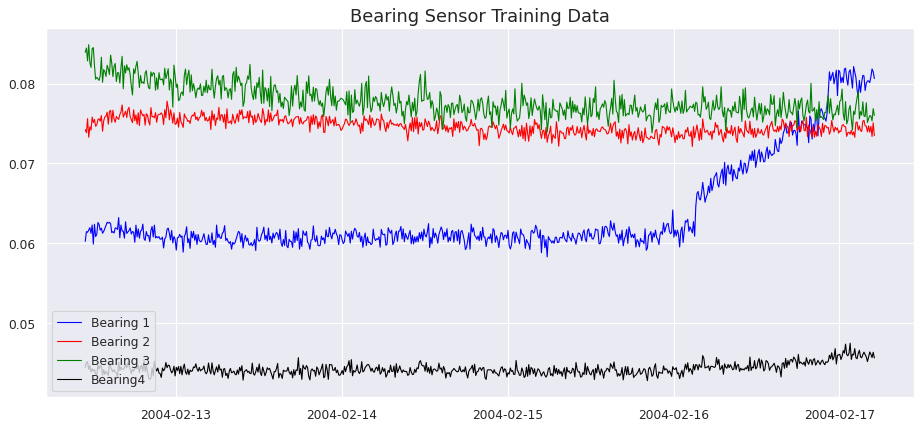

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['Bearing 1'], label='Bearing 1', color='blue', animated =
True, linewidth=1)
ax.plot(train['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train['Bearing 3'], label='Bearing 3', color='green', animated =
True, linewidth=1)
ax.plot(train['Bearing4'], label='Bearing4', color='black', animated =
True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()

In [ ]:
import joblib

In [ ]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [ ]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (686, 1, 4)
Test data shape: (296, 1, 4)


In [ ]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
    kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1344      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 4)              0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

In [ ]:
X_train.shape

(686, 1, 4)

In [ ]:
 # fit the model to the data
nb_epochs = 100
batch_size = 1
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,validation_split=0.05).history

Epoch 1/100
651/651 [==============================] - 7s 10ms/step - loss: 0.0798 - val_loss: 0.3382
Epoch 2/100
651/651 [==============================] - 8s 12ms/step - loss: 0.0786 - val_loss: 0.3356
Epoch 3/100
651/651 [==============================] - 7s 10ms/step - loss: 0.0784 - val_loss: 0.3328
Epoch 4/100
651/651 [==============================] - 7s 11ms/step - loss: 0.0783 - val_loss: 0.3319
Epoch 5/100
651/651 [==============================] - 5s 7ms/step - loss: 0.0785 - val_loss: 0.3350
Epoch 6/100
651/651 [==============================] - 4s 5ms/step - loss: 0.0782 - val_loss: 0.3411
Epoch 7/100
651/651 [==============================] - 4s 7ms/step - loss: 0.0783 - val_loss: 0.3400
Epoch 8/100
651/651 [==============================] - 4s 6ms/step - loss: 0.0783 - val_loss: 0.3350
Epoch 9/100
651/651 [==============================] - 3s 5ms/step - loss: 0.0785 - val_loss: 0.3320
Epoch 10/100
651/651 [==============================] - 3s 5ms/step - loss: 0.0781 - va

In [ ]:
train1 = df['2004-02-12 10:52:39': '2004-02-15 12:52:39']
test1 = df['2004-02-15 12:52:39':]
print("Training dataset shape:", train1.shape)
print("Test dataset shape:", test1.shape)

Training dataset shape: (445, 4)
Test dataset shape: (538, 4)


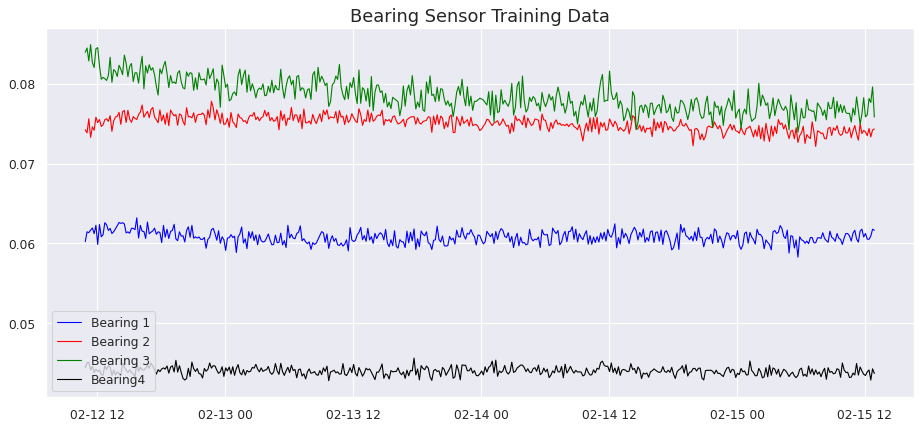

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train1['Bearing 1'], label='Bearing 1', color='blue', animated =True, linewidth=1)
ax.plot(train1['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train1['Bearing 3'], label='Bearing 3', color='green', animated =True, linewidth=1)
ax.plot(train1['Bearing4'], label='Bearing4', color='black', animated =True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()

In [ ]:
 # normalize the data
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(train1)
X_test1 = scaler.transform(test1)
scaler_filename = "scaler_data1"
joblib.dump(scaler, scaler_filename)

['scaler_data1']

In [ ]:
 # reshape inputs for LSTM [samples, timesteps, features]
X_train1 = X_train1.reshape(X_train1.shape[0], 1, X_train1.shape[1])
print("Training data shape:", X_train1.shape)
X_test1 = X_test1.reshape(X_test1.shape[0], 1, X_test1.shape[1])
print("Test data shape:", X_test1.shape)

Training data shape: (445, 1, 4)
Test data shape: (538, 1, 4)


In [ ]:
 # create the autoencoder model
model1 = autoencoder_model(X_train1)
model1.compile(optimizer='adam', loss='mae')
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 16)             1344      
                                                                 
 lstm_13 (LSTM)              (None, 4)                 336       
                                                                 
 repeat_vector_3 (RepeatVec  (None, 1, 4)              0         
 tor)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 1, 4)              144       
                                                                 
 lstm_15 (LSTM)              (None, 1, 16)             1344      
                                                           

In [ ]:
# fit the model to the data
nb_epochs = 100
batch_size = 1
history1 = model1.fit(X_train1, X_train1, epochs=nb_epochs, batch_size=batch_size,validation_split=0.05).history

Epoch 1/100
422/422 [==============================] - 8s 6ms/step - loss: 0.1874 - val_loss: 0.1130
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1031 - val_loss: 0.1100
Epoch 3/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1023 - val_loss: 0.1069
Epoch 4/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1018 - val_loss: 0.1111
Epoch 5/100
422/422 [==============================] - 3s 7ms/step - loss: 0.1022 - val_loss: 0.1122
Epoch 6/100
422/422 [==============================] - 3s 6ms/step - loss: 0.1007 - val_loss: 0.1199
Epoch 7/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1013 - val_loss: 0.1104
Epoch 8/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1014 - val_loss: 0.1161
Epoch 9/100
422/422 [==============================] - 2s 5ms/step - loss: 0.1004 - val_loss: 0.0997
Epoch 10/100
422/422 [==============================] - 2s 5ms/step - loss: 0.0997 - val_lo

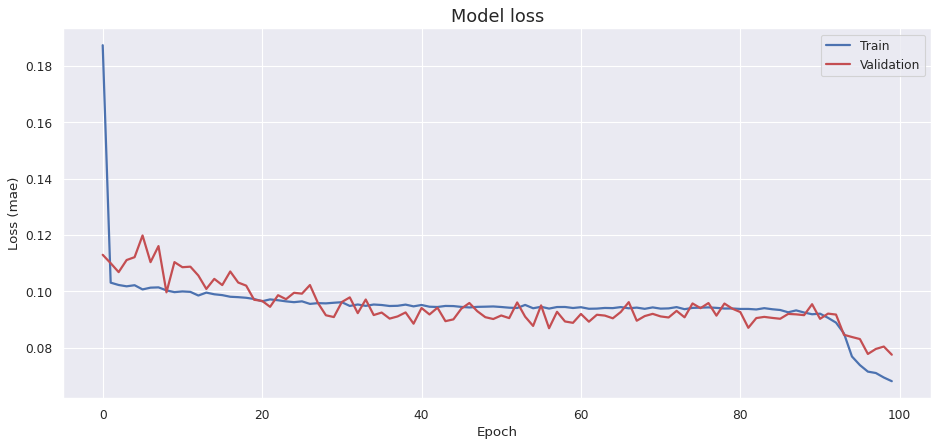

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history1['loss'], 'b', label='Train', linewidth=2)
ax.plot(history1['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

14/14 [==============================] - 1s 3ms/step


<ipython-input-112-b9d7749a6bad>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mae1'], bins = 20, kde= True, color = 'blue');


(0.0, 0.5)

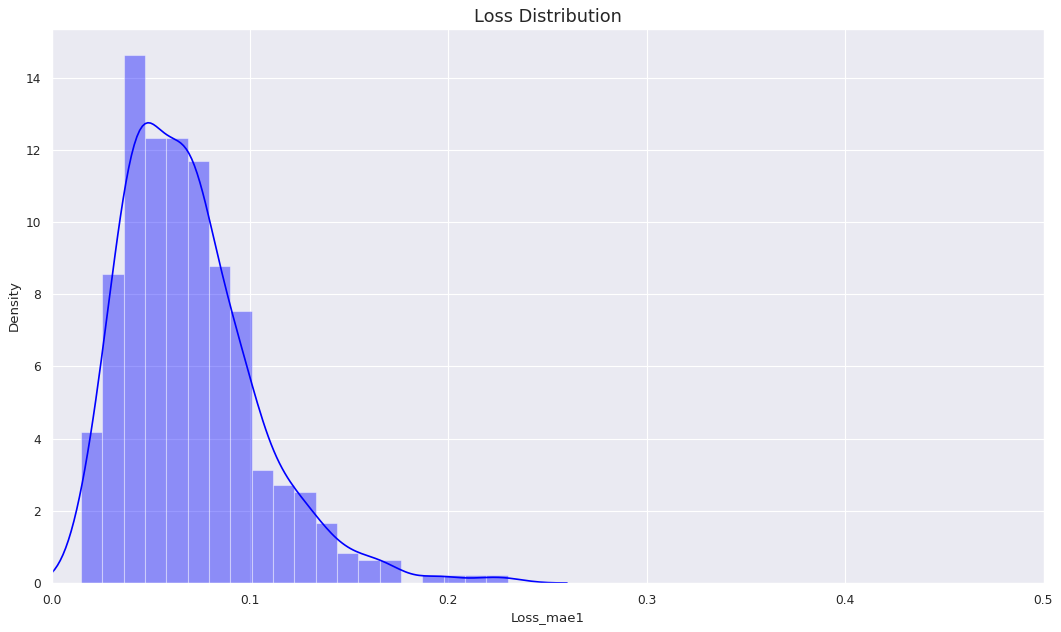

In [ ]:
# plot the loss distribution of the training set
X_pred1 = model1.predict(X_train1)
X_pred1 = X_pred1.reshape(X_pred1.shape[0], X_pred1.shape[2])
X_pred1 = pd.DataFrame(X_pred1, columns=train.columns)
X_pred1.index = train1.index
scored = pd.DataFrame(index=train.index)
Xtrain1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[2])
scored['Loss_mae1'] = np.mean(np.abs(X_pred1-Xtrain1), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae1'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

From the above loss distribution, let's try a threshold value of 0.275 for flagging an anomaly. We can then
calculate the loss in the test set to check when the output crosses the anomaly threshold

In [ ]:
# calculate the loss on the test set
X_pred1 = model1.predict(X_test1)
X_pred1 = X_pred1.reshape(X_pred1.shape[0], X_pred1.shape[2])
X_pred1 = pd.DataFrame(X_pred1, columns=test.columns)
X_pred1.index = test1.index
scored = pd.DataFrame(index=test1.index)
Xtest1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred1-Xtest1), axis = 1)
scored['Threshold'] = 0.275
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.shape

17/17 [==============================] - 0s 2ms/step


(538, 3)

In [ ]:
scored

,Loss_mae,Threshold,Anomaly
2004-02-15 12:52:39,0.085645,0.275,False
2004-02-15 13:02:39,0.077419,0.275,False
2004-02-15 13:12:39,0.048449,0.275,False
2004-02-15 13:22:39,0.049423,0.275,False
2004-02-15 13:32:39,0.040661,0.275,False
...,...,...,...
2004-02-19 05:42:39,22.694202,0.275,True
2004-02-19 05:52:39,17.257930,0.275,True
2004-02-19 06:02:39,18.510941,0.275,True
2004-02-19 06:12:39,11.255162,0.275,True


In [ ]:
# calculate the same metrics for the training set
# and merge all data in a single dataframe for plotting
X_pred_train1 = model1.predict(X_train1)
X_pred_train1 = X_pred_train1.reshape(X_pred_train1.shape[0], X_pred_train1.
shape[2])
X_pred_train1 = pd.DataFrame(X_pred_train1, columns=train.columns)
X_pred_train1.index = train1.index
scored_train = pd.DataFrame(index=train1.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train1-Xtrain1), axis = 1
)
scored_train['Threshold'] = 0.275
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

14/14 [==============================] - 0s 4ms/step


<Axes: >

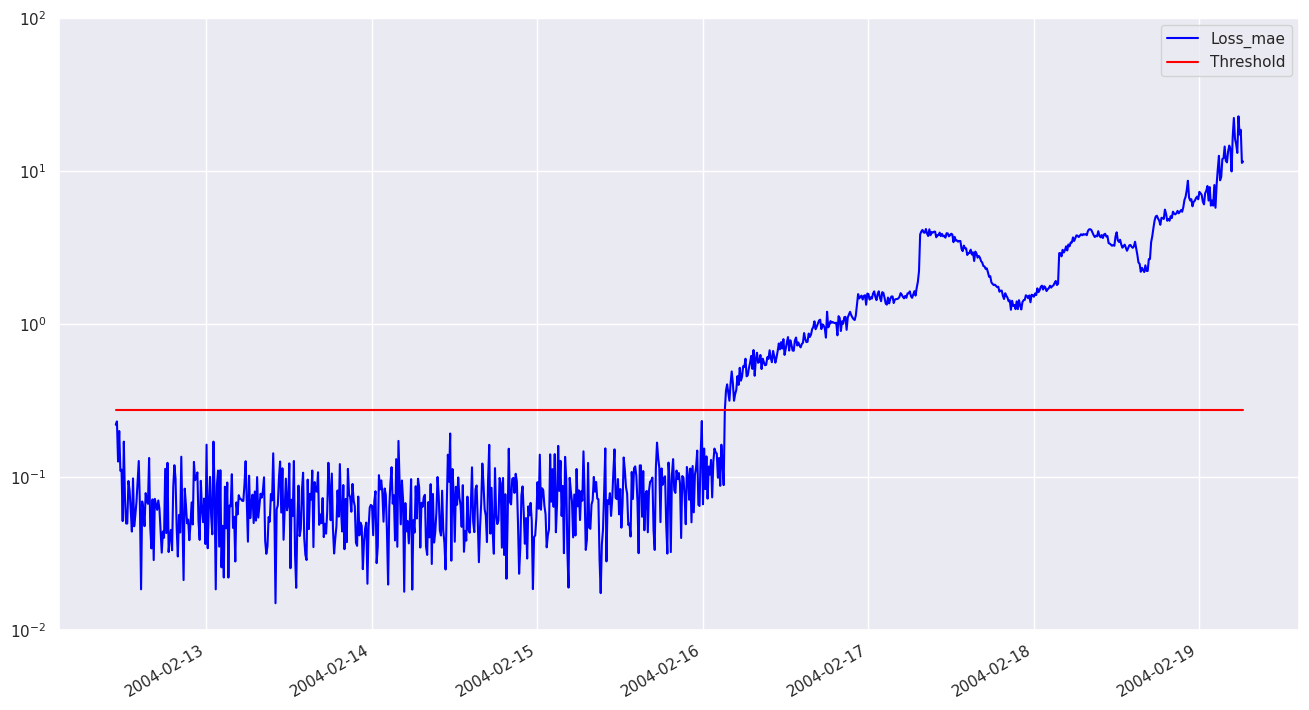

In [ ]:
# plot bearing failure time plot
scored.plot(logy=True, figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])

This analysis approach is able to flag the upcoming bearing malfunction well in advance of the actual physical
failure. It is important to define a suitable threshold value for flagging anomalies while avoiding too many false
positives during normal operating conditions

In [ ]:
# save all model information, including weights, in h5 format
model1.save("Model1.h5")
model.save("Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
